# mohammed credit card case study

In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [337]:
a1 = pd.read_csv('spend.csv')
b1 = pd.read_csv('Repayment.csv')
c1 = pd.read_csv('Customer Acqusition.csv')

In [385]:
b1.dropna(axis = 0,how = 'all',inplace = True)
b1.dropna(axis = 1,how = 'all',inplace = True)
b1.drop(columns = 'SL No:',inplace = True)

In [339]:
# 1(a)

In [340]:
c1.Age = np.where(c1.Age < 18 , np.mean(c1.Age) , c1.Age)

In [341]:
# (b)

In [342]:
xy = pd.merge(left = c1 , right = a1 , on = 'Customer' , how = 'inner')
xy

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22


In [343]:

b_wala = xy.Limit * 0.5

In [344]:
xy['Amount'] = np.where(xy.Amount > xy.Limit  , b_wala , xy.Amount )

In [346]:
# 1(c)
c_wala = pd.merge(left = b1 , right = c1 , 
         on = 'Customer' , how = 'inner')

In [347]:

c_wala.Amount = np.where(c_wala.Amount > c_wala.Limit ,
                           c_wala.Limit , c_wala.Amount)

In [348]:
# 2 (a)

In [349]:
a = c1.Customer.nunique()
a

100

In [350]:
# (b)
c1.Segment.value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

In [355]:
# (c)
b_wala = pd.to_datetime(a1.Month)

In [356]:
a1['month'] = b_wala.dt.strftime('%B')

In [357]:
a1['year'] = b_wala.dt.strftime('%Y')

In [358]:
round(a1.groupby(['year' , 'month']).Amount.mean().reset_index(),2)

,year,month,Amount
0,2004,April,235272.04
1,2004,February,221215.27
2,2004,January,251712.07
3,2004,March,232146.12
4,2004,May,217539.24
5,2004,November,270486.40
6,2004,September,310923.38
7,2005,April,252181.33
8,2005,August,233734.63
9,2005,December,147503.06


In [359]:
# (d)

In [360]:
d_wala = pd.to_datetime(b1.Month)

In [361]:
b1['month'] = d_wala.dt.strftime('%B')

In [362]:
b1['year'] = d_wala.dt.strftime('%Y')

In [363]:
b1.dropna(axis = 0 , how = 'all' , inplace = True)

In [364]:
b1.dropna(axis = 1 , how = 'all' , inplace = True)

In [365]:
round(b1.groupby(['month' , 'year']).Amount.mean().reset_index(),2)

,month,year,Amount
0,April,2004,259141.68
1,April,2005,212688.63
2,April,2006,275472.25
3,August,2005,264430.92
4,August,2006,224143.99
5,December,2005,320379.34
6,December,2006,252736.57
7,February,2004,256702.63
8,February,2005,238829.27
9,February,2006,284489.57


In [366]:
# (e)
repay = pd.read_csv('Repayment.csv')
repay['Month']=pd.to_datetime(repay['Month'])
repay['monthly']=repay['Month'].dt.strftime('%B')
repay['yearly']=repay['Month'].dt.strftime('%Y')
repay.dropna(axis = 0,how = 'all',inplace = True)
repay.dropna(axis = 1,how = 'all',inplace = True)
repay

,SL No:,Customer,Month,Amount,monthly,yearly
0,NaN,A1,2004-01-12,495414.75,January,2004
1,2.0,A1,2004-01-03,245899.02,January,2004
2,3.0,A1,2004-01-15,259490.06,January,2004
3,4.0,A1,2004-01-25,437555.12,January,2004
4,5.0,A1,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,May,2005
1496,1497.0,A68,2006-05-10,319836.49,May,2006
1497,1498.0,A69,2006-07-11,247628.45,July,2006
1498,1499.0,A70,2005-08-12,454016.51,August,2005


In [367]:
last = pd.merge(left=xy,right=repay,on="Customer",how="inner")

In [368]:
last.rename(columns={"Amount_x":"Spend_Amount","Amount_y":"Repay_Amount"},inplace=True)
last

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Spend_Amount,SL No:,Month_y,Repay_Amount,monthly,yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,NaN,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2.0,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,3.0,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,4.0,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,5.0,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98.0,2004-01-25,310992.30,January,2004
37280,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,99.0,2004-01-12,121874.90,January,2004
37281,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,100.0,2004-01-03,337815.57,January,2004
37282,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,101.0,2004-01-15,25682.73,January,2004


In [369]:
profit_amount =last.pivot_table(index=['yearly','monthly'],values=["Spend_Amount","Repay_Amount"],aggfunc='sum')

In [370]:
profit_amount["M_Profit"] = profit_amount.Repay_Amount - profit_amount.Spend_Amount
profit_amount.head(10)

Repay_Amount  Spend_Amount      M_Profit
yearly monthly                                            
2004   April      2.285403e+08  1.194516e+08  1.090887e+08
       February   1.602419e+08  7.613922e+07  8.410268e+07
       January    1.699210e+09  1.088357e+09  6.108525e+08
       March      8.974470e+07  5.594171e+07  3.380298e+07
       May        1.411594e+08  8.800456e+07  5.315485e+07
       November   7.860290e+07  5.504612e+07  2.355678e+07
       September  8.016122e+07  5.144278e+07  2.871844e+07
2005   April      1.747894e+08  9.366405e+07  8.112539e+07
       August     2.477449e+08  1.361400e+08  1.116049e+08
       December   9.944533e+07  4.348638e+07  5.595895e+07

In [371]:
positive_profit=profit_amount.loc[profit_amount["M_Profit"]>0]
positive_profit.head(10)

Repay_Amount  Spend_Amount      M_Profit
yearly monthly                                            
2004   April      2.285403e+08  1.194516e+08  1.090887e+08
       February   1.602419e+08  7.613922e+07  8.410268e+07
       January    1.699210e+09  1.088357e+09  6.108525e+08
       March      8.974470e+07  5.594171e+07  3.380298e+07
       May        1.411594e+08  8.800456e+07  5.315485e+07
       November   7.860290e+07  5.504612e+07  2.355678e+07
       September  8.016122e+07  5.144278e+07  2.871844e+07
2005   April      1.747894e+08  9.366405e+07  8.112539e+07
       August     2.477449e+08  1.361400e+08  1.116049e+08
       December   9.944533e+07  4.348638e+07  5.595895e+07

In [372]:
positive_profit["M_interest"] = positive_profit.M_Profit *0.029
round(positive_profit,0)

Repay_Amount  Spend_Amount     M_Profit  M_interest
yearly monthly                                                       
2004   April      2.285403e+08  1.194516e+08  109088679.0   3163572.0
       February   1.602419e+08  7.613922e+07   84102676.0   2438978.0
       January    1.699210e+09  1.088357e+09  610852460.0  17714721.0
       March      8.974470e+07  5.594171e+07   33802981.0    980286.0
       May        1.411594e+08  8.800456e+07   53154851.0   1541491.0
       November   7.860290e+07  5.504612e+07   23556780.0    683147.0
       September  8.016122e+07  5.144278e+07   28718444.0    832835.0
2005   April      1.747894e+08  9.366405e+07   81125389.0   2352636.0
       August     2.477449e+08  1.361400e+08  111604891.0   3236542.0
       December   9.944533e+07  4.348638e+07   55958949.0   1622810.0
       February   9.416163e+08  5.890557e+08  352560618.0  10224258.0
       January    1.810333e+08  1.324129e+08   48620420.0   1409992.0
       July       7.997268e+07  3.995653e+07   40016149.0   1160468.0
       June       2.213774e+08  1.174019e+08  103975517.0   3015290.0
       May        1.099197e+09  7.149030e+08  384294444.0  11144539.0
       November   2.763119e+08  1.532278e+08  123084058.0   3569438.0
       October    6.027830e+07  3.140993e+07   28868370.0    837183.0
       September  7.530449e+07  3.195551e+07   43348984.0   1257121.0
2006   April      6.093666e+08  3.229722e+08  286394374.0   8305437.0
       August     7.167032e+07  5.849630e+07   13174018.0    382047.0
       December   7.087702e+07  4.585222e+07   25024804.0    725719.0
       February   2.903280e+08  1.654843e+08  124843635.0   3620465.0
       January    8.974491e+07  5.127574e+07   38469168.0   1115606.0
       July       2.245720e+08  1.444093e+08   80162709.0   2324719.0
       June       6.914431e+07  5.302118e+07   16123126.0    467571.0
       March      1.115725e+09  7.393854e+08  376340025.0  10913861.0
       May        5.434823e+08  3.297954e+08  213686912.0   6196920.0
       November   1.355832e+08  1.124836e+08   23099549.0    669887.0
       October    7.890924e+07  5.285822e+07   26051016.0    755479.0
       September  8.083199e+07  5.395681e+07   26875182.0    779380.0

In [373]:
# (f)
f_wala = a1.groupby('Type').Amount.sum()

In [374]:
f_wala.sort_values(ascending = False).head()

Type
PETRO           49863174.09
CAMERA          41481571.96
FOOD            37773338.43
TRAIN TICKET    33067077.15
AIR TICKET      32955445.42
Name: Amount, dtype: float64

In [375]:
# (g)

In [376]:
g_wala = pd.merge(left = a1 , right = c1 ,
                  on = 'Customer' , how = 'inner')

In [377]:
g_wala.groupby('City').Amount.sum().sort_values(ascending = False).head(1)

City
COCHIN    73495349.26
Name: Amount, dtype: float64

In [378]:
# (h)

In [379]:
h_wala = pd.merge(left = c1 , right = a1 , on = 'Customer' , how = 'inner')

In [380]:
h_wala.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,month,year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,January,2005


In [381]:
h_wala['age_group']  = np.where((h_wala.Age >= 12) & (h_wala.Age <= 20), 'teenager',
                     np.where((h_wala.Age > 20) & (h_wala.Age <= 30), 'Young' ,
                     np.where((h_wala.Age > 30) & (h_wala.Age <= 45) , 'middle age',
                     np.where((h_wala.Age > 45) & (h_wala.Age <= 60) , 'matured',
                     'elderly'))))

In [382]:
round(h_wala.groupby('age_group').Amount.sum(),1).sort_values(ascending = False).head(1)

age_group
matured    117354725.8
Name: Amount, dtype: float64

In [383]:
# (i)

In [272]:
i_wala = pd.merge(left = b1 , right = c1 , on = 'Customer' , how = 'inner')

In [273]:
i_wala.head(1)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,1,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [274]:
i_wala.groupby('Customer').Amount.sum().sort_values(ascending = False).head(10)

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A22     9372561.68
A21     9056336.15
A43     8489871.46
A45     8448334.87
A12     8334760.16
A48     8292416.75
A14     7943268.63
Name: Amount, dtype: float64

In [275]:
# (3)

In [288]:
third_wala = pd.merge(left = c1  , right = a1 , on = 'Customer' , how = 'inner')

In [289]:
month = pd.to_datetime(third_wala.Month)

In [290]:
third_wala['year'] = month.dt.year

In [291]:
third_wala

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,year
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,2004
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,2004
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,2004
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,2004
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,2004
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,2004
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,2004
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,2004


In [292]:
third_wala.groupby(['City' , 'Product','year' ]).Amount.sum().reset_index()

,City,Product,year,Amount
0,BANGALORE,Gold,2004,9289878.54
1,BANGALORE,Gold,2005,12892362.99
2,BANGALORE,Gold,2006,12030611.09
3,BANGALORE,Platimum,2004,6046763.93
4,BANGALORE,Platimum,2005,7784194.68
...,...,...,...,...
67,TRIVANDRUM,Platimum,2005,7186762.35
68,TRIVANDRUM,Platimum,2006,4174473.45
69,TRIVANDRUM,Silver,2004,795897.19
70,TRIVANDRUM,Silver,2005,1445540.63


In [293]:

abc = third_wala.pivot_table(index = ['City' , 'year'] , columns = 'Product' , aggfunc = 'sum', values = 'Amount')

<AxesSubplot:xlabel='City,year'>

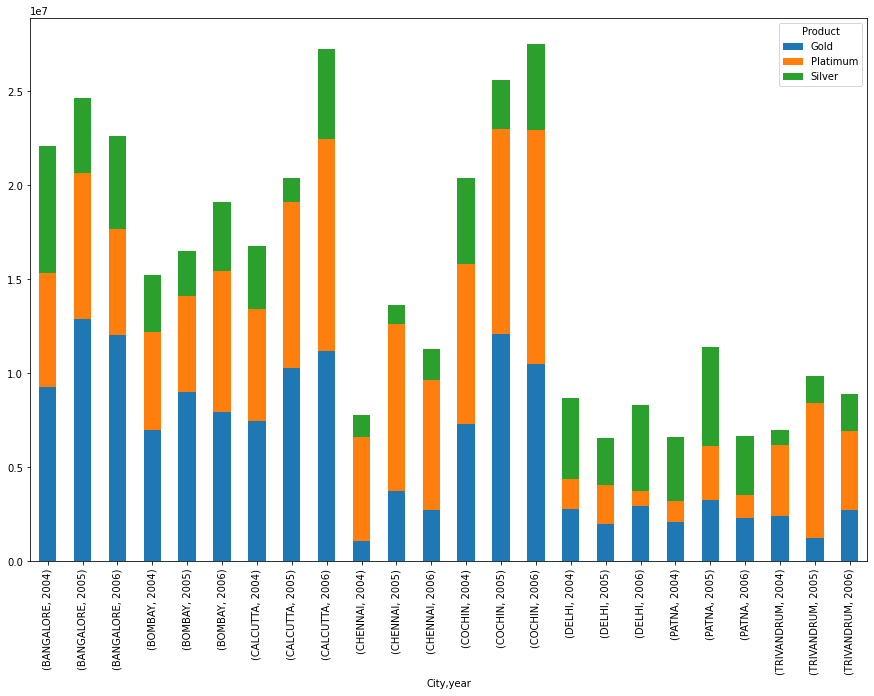

In [294]:
abc.plot(kind = 'bar' , figsize = (15,10), stacked = True )


In [283]:
# (a)
#month = pd.to_datetime(a1.Month)

In [306]:
third_wala['month'] = month.dt.month

In [307]:
# (4) (a)

In [308]:
fourth_wala = third_wala.pivot_table(columns = 'month' , index = 'City' , values = 'Amount' , aggfunc = 'sum' )
fourth_wala

month,1,2,3,4,5,6,7,8,9,10,11,12
City,,,,,,,,,,,,
BANGALORE,17782487.66,9875860.87,10765773.46,6182081.72,10743668.90,1382739.41,3737413.09,1552898.45,1306412.01,1855076.43,3435745.65,722473.97
BOMBAY,10681854.60,7813534.61,9857699.82,3726382.34,6974931.87,1486412.18,612457.59,1066744.75,1835082.87,1047561.39,5120665.55,604939.17
CALCUTTA,14163384.38,11449586.70,10076115.86,6883832.96,7868030.30,2693423.54,2323261.43,2179294.85,2208767.98,622463.42,3490771.91,456826.68
CHENNAI,7649568.68,5866408.35,4413870.52,3231144.38,4422623.36,1903803.90,1186667.37,681577.16,1591669.63,156247.17,1347779.28,223628.27
COCHIN,18692606.60,9459367.08,10733411.24,7070107.83,9912248.75,2738031.53,1758023.02,2582997.08,1739644.69,1668786.53,5128350.59,2011774.32
DELHI,7373794.37,3072043.85,3386628.30,2845176.75,2638193.66,828262.78,488399.04,475893.81,245802.04,64615.46,1130584.99,967169.49
PATNA,7388720.78,3466726.76,3795753.30,2786278.83,3476601.00,1653183.92,191003.23,813559.15,70329.95,329537.34,413677.87,223902.41
TRIVANDRUM,5688758.54,4459329.30,3855833.54,2775772.32,4631877.09,828576.89,960551.29,561400.55,215826.30,285581.92,856809.41,640922.26


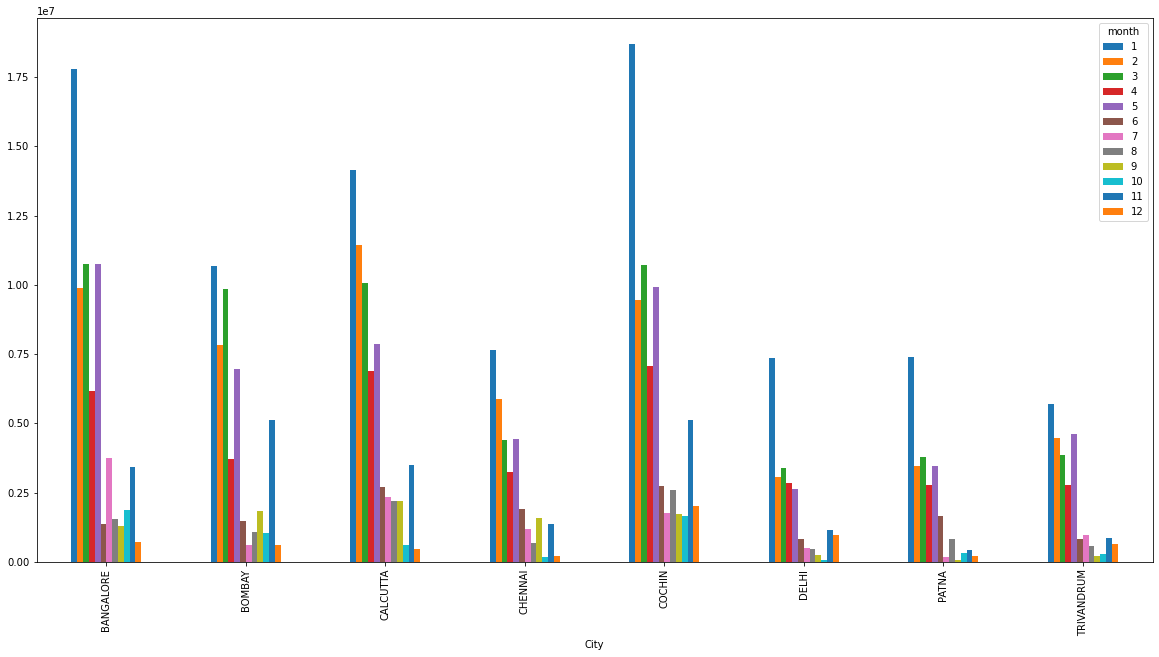

In [309]:
fourth_wala.plot(kind = 'bar' , figsize = (20,10))
plt.show()

In [310]:
# (b)

zx = pd.to_datetime(a1.Month)

In [311]:
a1['year'] = zx.dt.year

In [312]:
#a1.groupby(['year' , 'yx']).Amount.sum()

In [313]:
yxz = a1[a1.Type == 'AIR TICKET' ]
yxz

,Sl No:,Customer,Month,Type,Amount,year
10,11,A11,23-Feb-05,AIR TICKET,307622.01,2005
29,30,A30,10-May-06,AIR TICKET,24399.98,2006
40,41,A41,27-May-05,AIR TICKET,359764.34,2005
55,56,A56,3-Feb-06,AIR TICKET,22463.65,2006
70,71,A69,17-Jan-05,AIR TICKET,113339.36,2005
...,...,...,...,...,...,...
1426,1427,A39,16-Feb-05,AIR TICKET,211569.74,2005
1448,1449,A61,12-Aug-05,AIR TICKET,487680.73,2005
1462,1463,A45,1-Jun-05,AIR TICKET,443959.84,2005
1477,1478,A60,3-Jul-06,AIR TICKET,273977.69,2006


In [314]:
ab = yxz.groupby('year').Amount.sum()

<AxesSubplot:xlabel='year'>

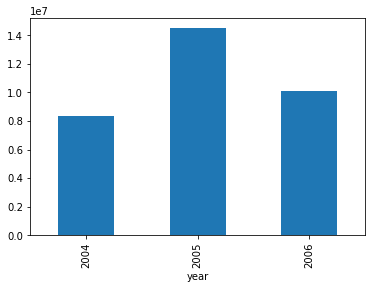

In [315]:
ab.plot(kind = 'bar')


In [316]:
# (c)

In [317]:
fourth_wala_c = third_wala.groupby(['Product','month']).Amount.sum().reset_index()
fourth =fourth_wala_c.pivot(columns = 'Product' , index = 'month' , values = 'Amount')

<AxesSubplot:xlabel='month'>

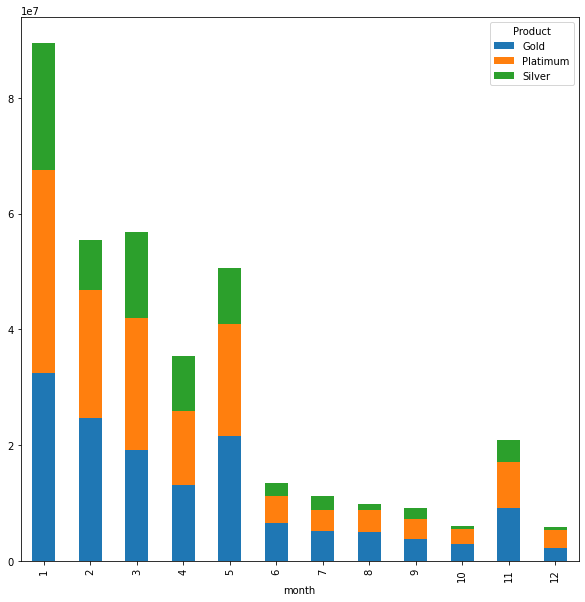

In [318]:
fourth.plot(kind = 'bar' , stacked = True  , figsize = (10,10))

In [326]:
# (5)
repay

,SL No:,Customer,Month,Amount,monthly,yearly
0,NaN,A1,2004-01-12,495414.75,January,2004
1,2.0,A1,2004-01-03,245899.02,January,2004
2,3.0,A1,2004-01-15,259490.06,January,2004
3,4.0,A1,2004-01-25,437555.12,January,2004
4,5.0,A1,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...
1495,1496.0,A67,2005-05-09,55638.77,May,2005
1496,1497.0,A68,2006-05-10,319836.49,May,2006
1497,1498.0,A69,2006-07-11,247628.45,July,2006
1498,1499.0,A70,2005-08-12,454016.51,August,2005


In [327]:
fifth_wala = pd.merge(left = repay , right = c1 , on = 'Customer' , how = 'inner')
fifth_wala

,SL No:,Customer,Month,Amount,monthly,yearly,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,2004-01-12,495414.75,January,2004,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,2004-01-03,245899.02,January,2004,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,2004-01-15,259490.06,January,2004,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,2004-01-25,437555.12,January,2004,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,2005-01-17,165972.88,January,2005,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,277.0,A7,2005-11-22,55108.71,November,2005,7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295.0,A7,2005-12-03,429700.12,December,2005,7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313.0,A7,2005-02-23,344628.72,February,2005,7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331.0,A7,2006-03-31,336264.37,March,2006,7,26,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [333]:
def xyz(st,st_1):
    return fifth_wala.loc[(fifth_wala.Product == st_1) & ((fifth_wala.yearly == st) | (fifth_wala.monthly == st))].groupby(['City' ,'Customer', 'Product' , 'yearly','monthly' ])['Amount'].sum().sort_index().reset_index()

In [334]:
xyz('January' , 'Gold')

,City,Customer,Product,yearly,monthly,Amount
0,BANGALORE,A1,Gold,2004,January,2241833.41
1,BANGALORE,A1,Gold,2005,January,165972.88
2,BANGALORE,A13,Gold,2004,January,1627668.57
3,BANGALORE,A13,Gold,2005,January,386518.41
4,BANGALORE,A14,Gold,2004,January,993114.87
5,BANGALORE,A30,Gold,2004,January,379512.30
6,BANGALORE,A30,Gold,2005,January,228554.19
7,BANGALORE,A43,Gold,2004,January,1906497.47
8,BANGALORE,A43,Gold,2005,January,71540.68
9,BANGALORE,A63,Gold,2004,January,372179.26


In [335]:
xyz('2006','Gold')

,City,Customer,Product,yearly,monthly,Amount
0,BANGALORE,A1,Gold,2006,April,508949.16
1,BANGALORE,A1,Gold,2006,November,169358.40
2,BANGALORE,A1,Gold,2006,September,186427.50
3,BANGALORE,A13,Gold,2006,April,494392.40
4,BANGALORE,A13,Gold,2006,August,221431.58
...,...,...,...,...,...,...
123,TRIVANDRUM,A28,Gold,2006,February,318811.88
124,TRIVANDRUM,A28,Gold,2006,January,84875.95
125,TRIVANDRUM,A28,Gold,2006,July,380460.40
126,TRIVANDRUM,A28,Gold,2006,March,1547067.86
